In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Flood_respose.csv', encoding='utf-8')

# Display basic information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4774 entries, 0 to 4773
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    4774 non-null   int64 
 1   gender                4762 non-null   object
 2   location_district     4711 non-null   object
 3   location_upazila      4691 non-null   object
 4   location_village      4098 non-null   object
 5   caller_need           4773 non-null   object
 6   note                  486 non-null    object
 7   status                4773 non-null   object
 8   resolve_organization  4774 non-null   object
 9   feedback_status       4774 non-null   object
 10  resolve_comment       2012 non-null   object
 11  resolve_at            2047 non-null   object
 12  created_at            3602 non-null   object
 13  Unnamed: 13           1 non-null      object
dtypes: int64(1), object(13)
memory usage: 522.3+ KB
None


## Distribution of caller needs across districts

In [2]:
caller_needs_district = data.groupby(['location_district', 'caller_need']).size().unstack(fill_value=0)
caller_needs_district

caller_need,Food,Medicine,Rescue
location_district,,,
BAGERHAT,2,0,0
BARGUNA,1,0,0
BARISAL,1,0,0
BHOLA,1,0,0
BRAHMANBARIA,11,0,0
CHANDPUR,37,0,0
CHATTOGRAM,35,0,1
COMILLA,59,0,0
COXS BAZAR,14,0,1


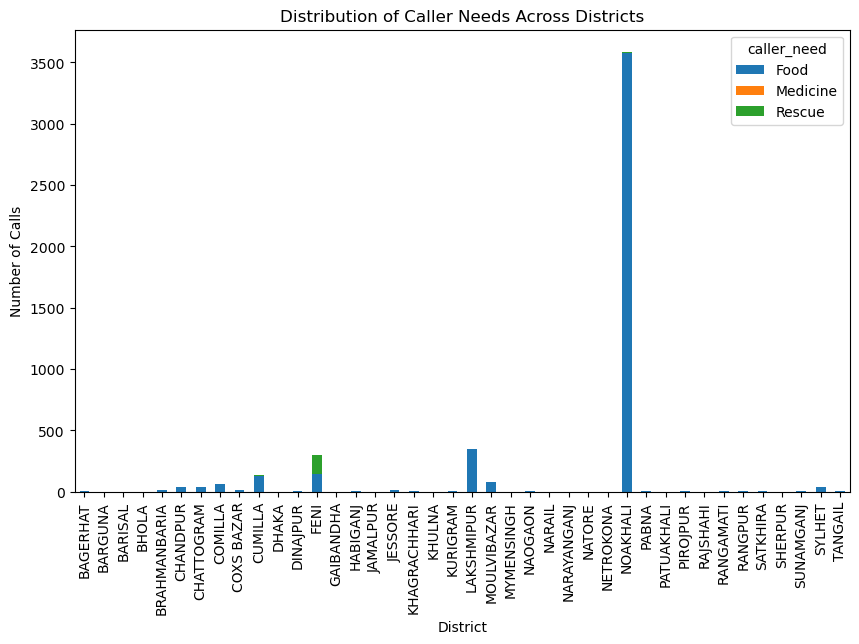

In [3]:
caller_needs_district.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Caller Needs Across Districts")
plt.xlabel("District")
plt.ylabel("Number of Calls")
plt.show()

## Resolution status variation by gender

In [4]:
resolution_status_gender = data.groupby(['gender', 'status']).size().unstack(fill_value=0)
resolution_status_gender

status,Pending,Resolved,Unknown
gender,,,
Female,1546,49,0
Male,1019,55,0
O,25,0,0
Unknown,171,1895,1


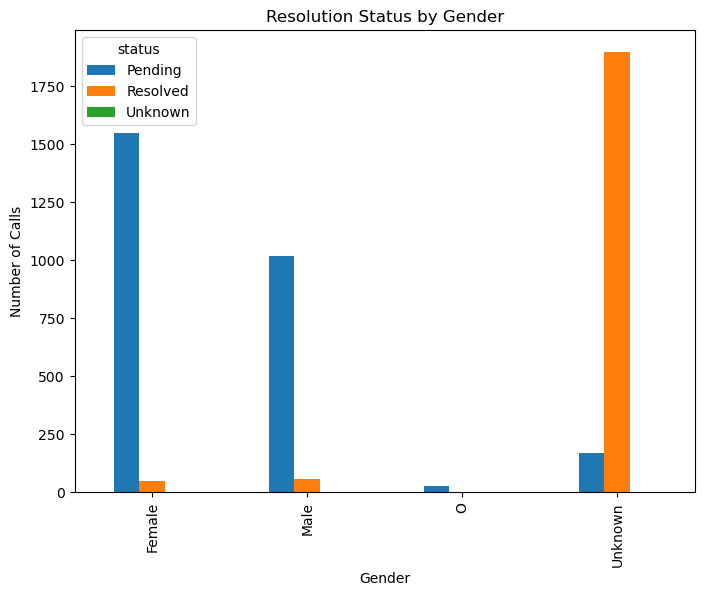

In [5]:
resolution_status_gender.plot(kind='bar', figsize=(8, 6))
plt.title("Resolution Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Calls")
plt.show()

## Trends in the number of calls over time

In [6]:
# Convert date columns to datetime for proper analysis
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')

calls_over_time = data['created_at'].value_counts().sort_index()
calls_over_time

created_at
2024-08-23    229
2024-08-24    213
2024-08-25     46
2024-08-26    418
2024-08-27    235
2024-08-28    201
2024-08-29    221
2024-08-30     10
2024-08-31    256
2024-09-01    204
2024-09-02     95
2024-09-03     84
2024-09-04    172
2024-09-05    168
2024-09-06    136
2024-09-07    112
2024-09-08    340
2024-09-09    100
2024-09-10    361
Name: count, dtype: int64

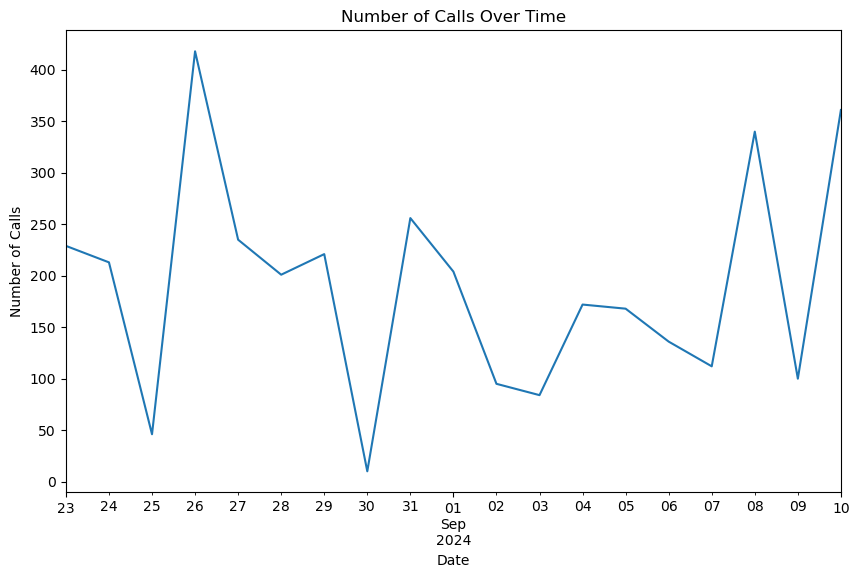

In [7]:
calls_over_time.plot(kind='line', figsize=(10, 6))
plt.title("Number of Calls Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.show()

## Correlation between Caller Need and Feedback Status

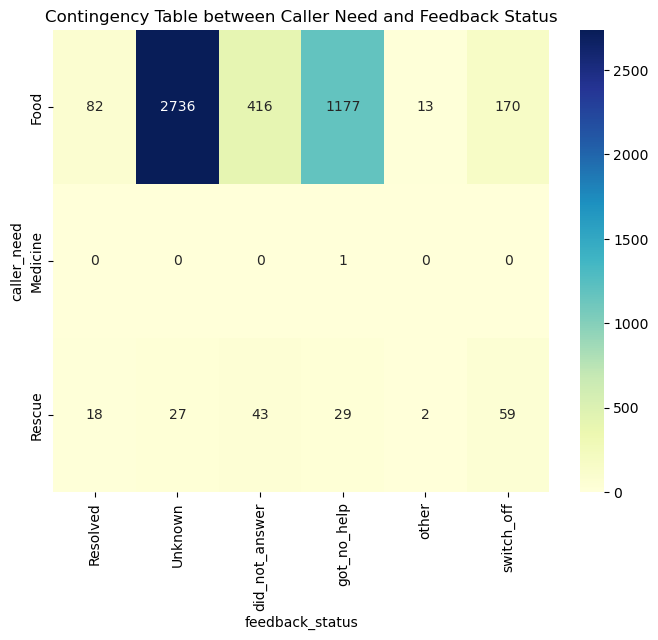

In [8]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['caller_need'], data['feedback_status'])

# Heatmap of the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Contingency Table between Caller Need and Feedback Status")
plt.show()

##  Most Common Needs in Districts with the Highest Number of Unresolved Cases

In [9]:
# Filter for unresolved cases
unresolved_cases = data[data['status'] == 'Pending']

# Count unresolved cases per district
unresolved_by_district = unresolved_cases['location_district'].value_counts().head()

# Filter unresolved cases in top districts
top_districts = unresolved_cases[unresolved_cases['location_district'].isin(unresolved_by_district.index)]

# Find the most common needs in these top districts
common_needs_top_districts = top_districts.groupby(['location_district', 'caller_need']).size().unstack(fill_value=0)

print(common_needs_top_districts)

caller_need        Food  Rescue
location_district              
COMILLA              59       0
CUMILLA              65       1
FENI                 83      25
LAKSHMIPUR          197       0
NOAKHALI           2129       0


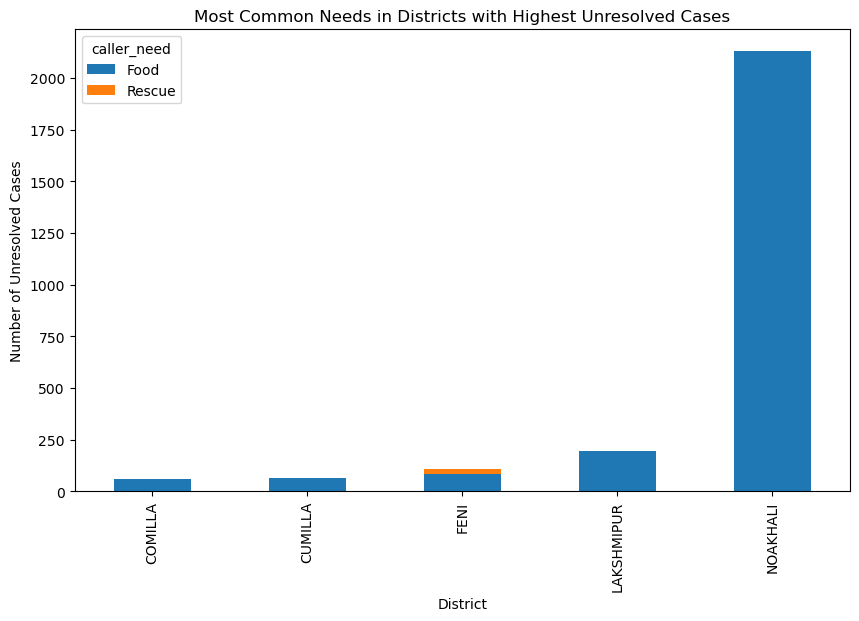

In [10]:
# Stacked bar chart for visualization
common_needs_top_districts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Most Common Needs in Districts with Highest Unresolved Cases")
plt.xlabel("District")
plt.ylabel("Number of Unresolved Cases")
plt.show()

## Difference in Resolution Time Across Different Types of Caller Needs

/tmp/ipykernel_56166/242419688.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='caller_need', y='resolution_time', data=resolution_time_data, inner="quartile", palette="Set2")


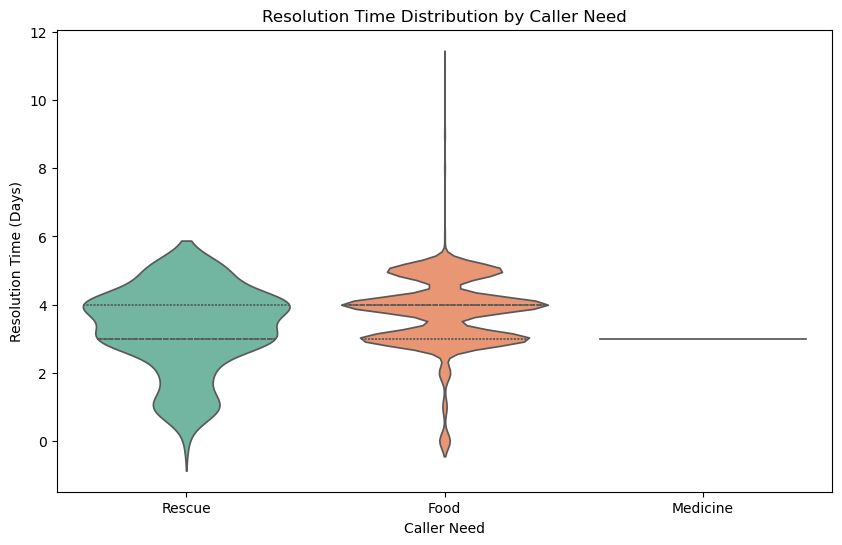

In [11]:
from scipy.stats import f_oneway

# Convert resolve_at and created_at to datetime
data['resolve_at'] = pd.to_datetime(data['resolve_at'], errors='coerce')
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')

# Calculate resolution time in days
data['resolution_time'] = (data['resolve_at'] - data['created_at']).dt.total_seconds() / (60 * 60 * 24)

# Remove rows with missing resolution time
resolution_time_data = data.dropna(subset=['resolution_time', 'caller_need'])

# Violin Plot of resolution time by caller need
plt.figure(figsize=(10, 6))
sns.violinplot(x='caller_need', y='resolution_time', data=resolution_time_data, inner="quartile", palette="Set2")
plt.title("Resolution Time Distribution by Caller Need")
plt.xlabel("Caller Need")
plt.ylabel("Resolution Time (Days)")
plt.show()

## Frequency of different feedback statuses over time

In [12]:
# Group by created_at and feedback status
feedback_over_time = data.groupby([data['created_at'].dt.date, 'feedback_status']).size().unstack(fill_value=0)

print(feedback_over_time)

feedback_status  Resolved  Unknown  did_not_answer  got_no_help  other  \
created_at                                                               
2024-08-23             25       37              37           79      2   
2024-08-24              8       15              58           97      3   
2024-08-25              1        4              13           24      0   
2024-08-26             22       23              88          241      2   
2024-08-27              9        9              45          149      0   
2024-08-28             13       11              41          118      2   
2024-08-29              5       16              51          128      1   
2024-08-30              1        0               2            4      0   
2024-08-31              9       16              49          164      2   
2024-09-01              4        9              41          137      0   
2024-09-02              1       32              22           34      0   
2024-09-03              1       41    

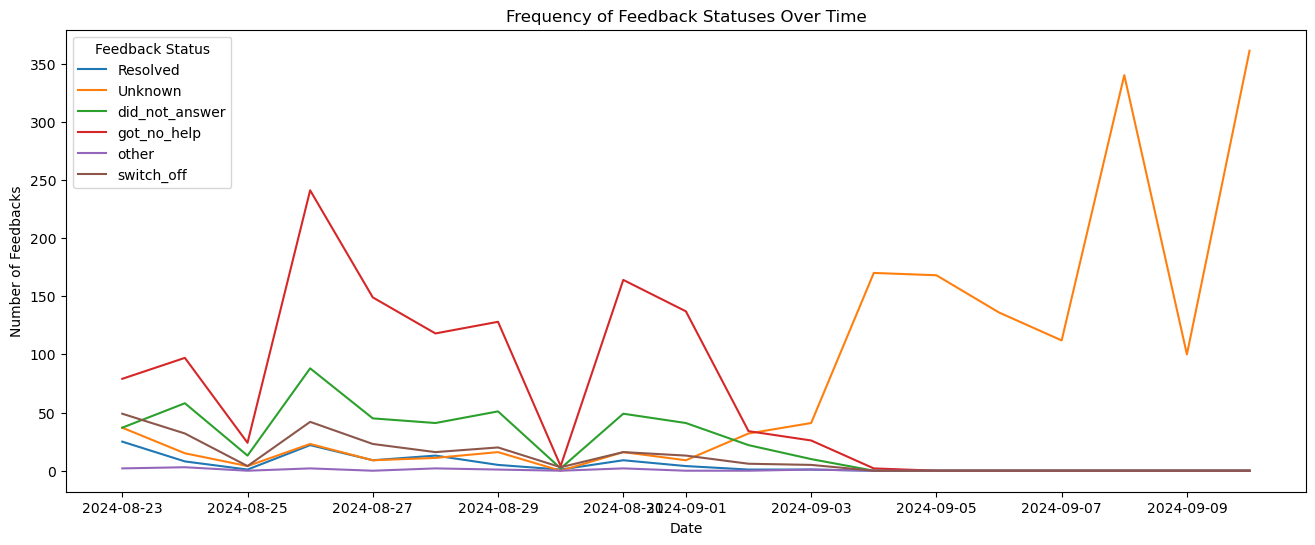

In [13]:
# Line chart for feedback statuses over time
feedback_over_time.plot(kind='line', figsize=(16, 6))
plt.title("Frequency of Feedback Statuses Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Feedbacks")
plt.legend(title="Feedback Status")
plt.show()

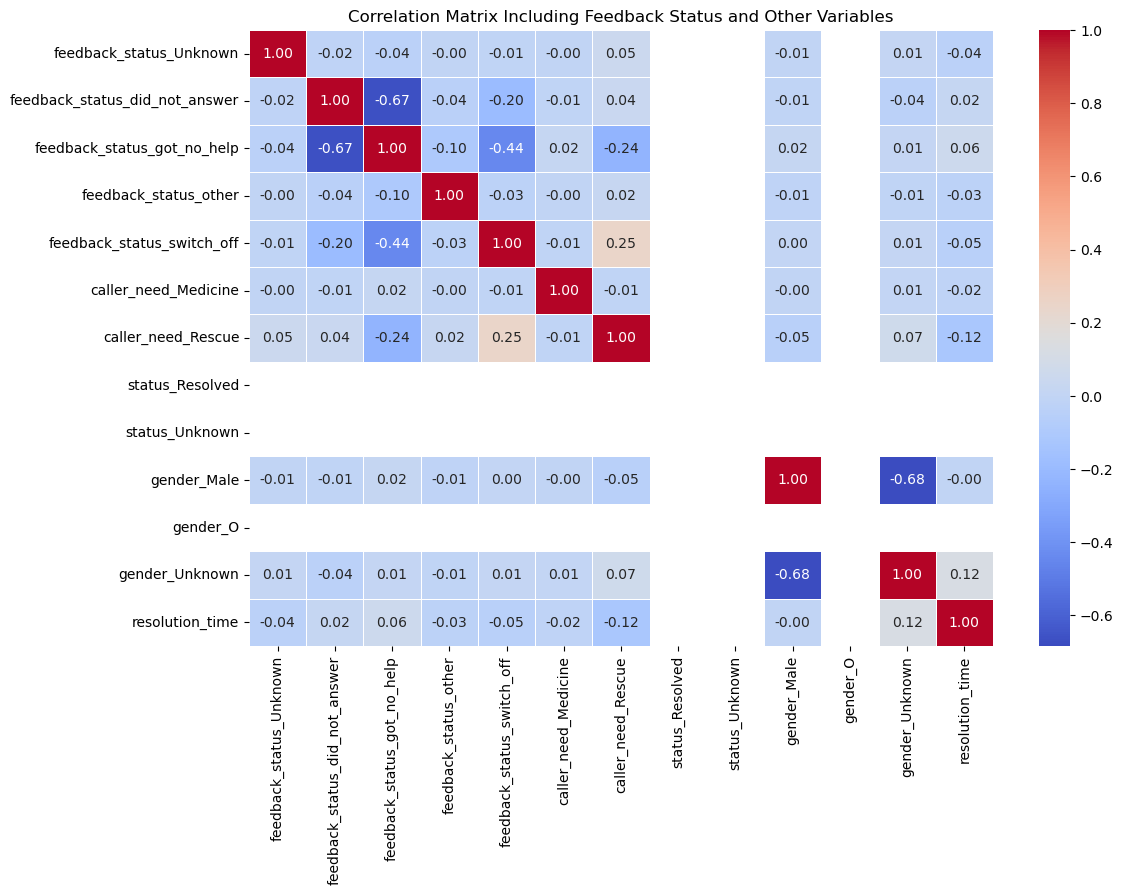

In [14]:

# Encoding categorical variables
encoded_data = pd.get_dummies(data[['feedback_status', 'caller_need', 'status', 'gender']], drop_first=True)

# Adding resolution_time to the encoded data
encoded_data['resolution_time'] = data['resolution_time']

# Drop rows with missing values in resolution time
encoded_data = encoded_data.dropna(subset=['resolution_time'])

# Compute the correlation matrix
correlation_matrix = encoded_data.corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Including Feedback Status and Other Variables")
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Convert 'created_at' to datetime
data['created_at'] = pd.to_datetime(data['created_at'], format='%m/%d/%Y')

# Group by district and date, and count caller needs
district_needs = data.groupby(['location_district', 'created_at']).size().reset_index(name='caller_needs')

# Feature engineering: Convert dates to numerical format for regression
district_needs['date_numeric'] = (district_needs['created_at'] - district_needs['created_at'].min()).dt.days

# Prepare the data for modeling
X = district_needs[['date_numeric']]  # Independent variable: the date
y = district_needs['caller_needs']    # Dependent variable: number of caller needs

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict for the next two days
next_two_days = pd.DataFrame({'date_numeric': [X['date_numeric'].max() + 1, X['date_numeric'].max() + 2]})
predictions = model.predict(next_two_days)
print(f"Predicted caller needs for the next two days: {predictions}")

Mean Squared Error: 3488.7473105552026
Predicted caller needs for the next two days: [19.61109253 19.60455028]
